##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [203]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import chardet
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import pandas as pd
from typing import Union
import matplotlib.pyplot as plt

In [204]:
class First_second_task:
    def __init__(self, file_source: str, x_column_name:  Union[str,list], y_column_name:  Union[str,list]) -> None:
        self.file_source = file_source
        self.x_column_name = x_column_name
        self.y_column_name = y_column_name

        with open(self.file_source, 'rb') as f:
            enc = chardet.detect(f.read())

        self.data_from_original_file = pd.read_csv(self.file_source ,  encoding = enc['encoding'])
    
    def callback_data(self):
        return self.data_from_original_file

    def read_data(self):
        data_frame = pd.DataFrame(self.data_from_original_file)
        print(data_frame)

    def describe(self):
        print(self.data_from_original_file.describe())

    def shape(self):
        print(self.data_from_original_file.shape)

    def scatter(self):
        self.data_from_original_file.plot.scatter(x =self.x_column_name, y = self.y_column_name)

    def coef_intercept(self):
        x = self.data_from_original_file[self.x_column_name].to_numpy()
        y = self.data_from_original_file[self.y_column_name].to_numpy()
        self.x_train, self.x_test, self.y_train, self.y_test = model_selection.train_test_split(
                                                            x, y, test_size=0.3,
                                                            random_state=30)

        if len(self.x_train.shape) == 1:
                    self.x_train = self.x_train.reshape(-1,1)
                    self.x_test = self.x_test.reshape(-1,1)

        self.regression1 = linear_model.LinearRegression().fit(self.x_train,self.y_train)
        coef = self.regression1.coef_
        coef = np.round(coef, 3)
        intercept = self.regression1.intercept_
        intercept = np.round(intercept, 3)
        print('coef is: ' + str(coef) + ' \n intercept is: \n' + str(intercept))

    def predicetd(self):
        self.y_predicted = self.regression1.predict(self.x_test)
        print('predicted value is: ' + '\n' + str(self.y_predicted) + '\n' 
        + 'but tested is:'  + '\n' + str(self.y_test))
    
    def second_diagram(self):
        plt.scatter(self.x_test, self.y_test)
        plt.plot(self.x_test, self.y_predicted, 'g')
        plt.xlabel(self.x_column_name)
        plt.ylabel(self.y_column_name)
        plt.grid()
    
    def function_error(self):
        self.y_predicted = self.regression1.predict(self.x_test)
        mean_abs_error = metrics.mean_absolute_error(self.y_test, self.y_predicted)
        mean_abs_error = np.round(mean_abs_error, 3)
        mean_square_error = metrics.mean_squared_error(self.y_test, self.y_predicted)
        mean_square_error = np.round(mean_square_error, 3)

        print('Abs error: ' + str(mean_abs_error) + ' mean square error ' + str(mean_square_error))



In [205]:
original_file = 'SCORES.csv'
zad_1 = First_second_task(original_file, 'Hours', 'Scores')
zad_1.read_data()


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [206]:
zad_1.describe()

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [207]:
zad_1.shape()

(25, 2)


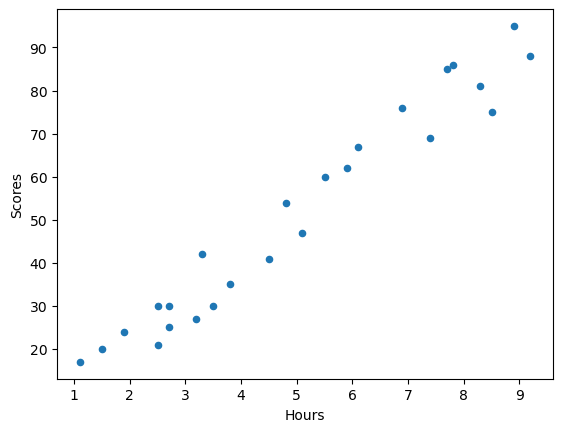

In [208]:
zad_1.scatter()

In [209]:
zad_1.coef_intercept()

coef is: [9.743] 
 intercept is: 
3.167


In [210]:
zad_1.predicetd()

predicted value is: 
[78.19067251 27.52545889 75.26767942 27.52545889 70.39602426 92.80563798
 37.2687692  84.0366587 ]
but tested is:
[85 30 69 21 76 88 30 81]


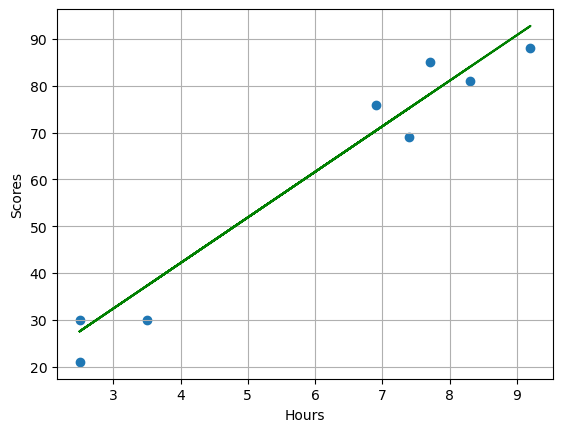

In [211]:
zad_1.second_diagram()

In [212]:
zad_1.function_error()

Abs error: 5.349 mean square error 31.364


In [235]:
#Uzyskane wyników dla tego modelu sa zadawalające, ponieważ błąd
# kwadratowy nie jest stosunkowo duży, przez co model regresji jest dobrze
# poprowadzony 

Zadanie dla SBP.csv

In [213]:
original_file = 'SBP.csv'
zad_1 = First_second_task(original_file, 'Age', 'SBP')
zad_1.read_data()

    Age  SBP
0    60  117
1    61  120
2    74  145
3    57  129
4    63  132
5    68  130
6    66  127
7    77  163
8    63  136
9    54  115
10   63  118
11   76  132
12   60  111
13   61  112
14   65  147
15   79  138
16   69  141
17   56  124
18   62  122


In [214]:
zad_1.describe()

             Age         SBP
count  19.000000   19.000000
mean   64.947368  129.421053
std     7.214751   13.454928
min    54.000000  111.000000
25%    60.500000  119.000000
50%    63.000000  129.000000
75%    68.500000  137.000000
max    79.000000  163.000000


In [215]:
zad_1.shape()

(19, 2)


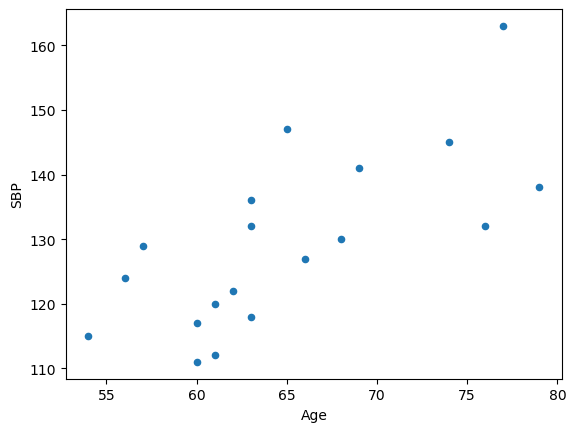

In [216]:
zad_1.scatter()

In [217]:
zad_1.coef_intercept()

coef is: [1.458] 
 intercept is: 
35.049


In [218]:
zad_1.predicetd()

predicted value is: 
[126.91684729 122.54216749 129.83330049 145.8737931  126.91684729
 131.29152709]
but tested is:
[118 117 147 132 136 127]


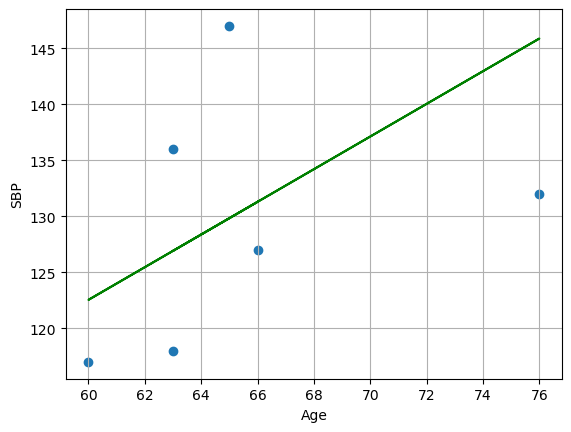

In [219]:
zad_1.second_diagram()

In [220]:
zad_1.function_error()

Abs error: 9.812 mean square error 116.387


In [237]:
# uważam że bład jest znacznie wyższy niż w poprzednim modelu, ponado 
# model regresji jest widocznie gorszy, co rzutuje na dobrane dane.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [221]:
original_file = 'Petrol.csv'
zad_2 = First_second_task(original_file, 'Zuzycie_paliwa', ['Podatek_paliwowy','Sredni_przychod','Utwardzone_autostrady','Procent_ludnosci_z_prawem_jazdy'])
data_petrol = zad_2.callback_data()

data_petrol.head()


,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [222]:
data_petrol.describe()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [223]:
zad_2.coef_intercept()

coef is: [[-0.004]
 [-1.551]
 [-0.792]
 [ 0.   ]] 
 intercept is: 
[9.891000e+00 5.121485e+03 6.483193e+03 3.590000e-01]


In [224]:
zad_2.function_error()

Abs error: 683.805 mean square error 1921787.317


In [ ]:
# błąd kwadratwy, który wynika z dobranych danych jest stosunkowo bardzo duży
# rzutuje to fakt, że dane pobrane z predykcji znacznie różnia się od 
# testowych danych

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [225]:
data_heart = pd.read_csv('HEART.csv')
data_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [226]:
data_heart.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [227]:
data_heart[data_heart=="?"] = np.nan
data_heart.isna().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [228]:
data_heart.drop(['slope','ca','thal'],axis=1,inplace=True)
data_heart.dropna(axis=0,inplace=True)

In [229]:
data_heart = pd.get_dummies(data_heart, columns = ['cp', 'restecg'])
data_heart

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2
0,28,1,130,132,0,185,0,0.0,0,0,1,0,0,0,0,1
1,29,1,120,243,0,160,0,0.0,0,0,1,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,1,0,0,0,0,1,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,0,1,0
5,32,0,105,198,0,165,0,0.0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160,331,0,94,1,2.5,1,0,0,0,1,1,0,0
290,54,0,130,294,0,100,1,0.0,1,0,0,1,0,0,1,0
291,56,1,155,342,1,150,1,3.0,1,0,0,0,1,1,0,0
292,58,0,180,393,0,110,1,1.0,1,0,1,0,0,1,0,0


In [230]:
x = data_heart.drop(['num       '],axis=1)
y = data_heart.drop(x,axis=1)
x = x.to_numpy()
y = y.to_numpy()

In [231]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.2,random_state=30)

In [232]:
maked_pipline = make_pipeline(StandardScaler(), LogisticRegression())
maked_pipline.fit(x_train,y_train.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [233]:
y_pred = maked_pipline.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.76      0.65      0.70        20

    accuracy                           0.79        53
   macro avg       0.79      0.76      0.77        53
weighted avg       0.79      0.79      0.79        53

